In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import math

In [4]:
spotify = pd.read_csv('universal_top_spotify_songs.csv')

/var/folders/75/p026c7vj06qb1cwvpcnx3n1c0000gn/T/ipykernel_17901/2661004252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spotify.corr())


<Axes: >

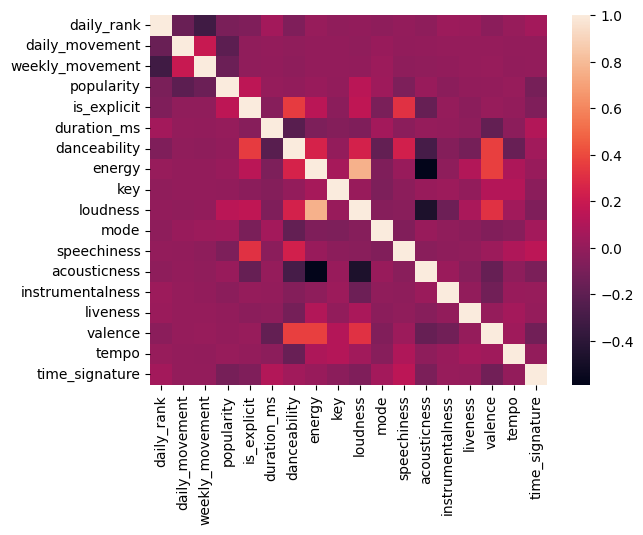

In [5]:
sns.heatmap(spotify.corr())

# Data Cleaning

In [6]:
# dealing with null values in the country tab
countries = {country.alpha_2: country.name for country in pycountry.countries}

countries['Global'] = 'Global'

spotify['country'].fillna('Global', inplace = True)

# replacing country codes with full names
spotify['country'] = spotify['country'].replace(countries)

<Axes: >

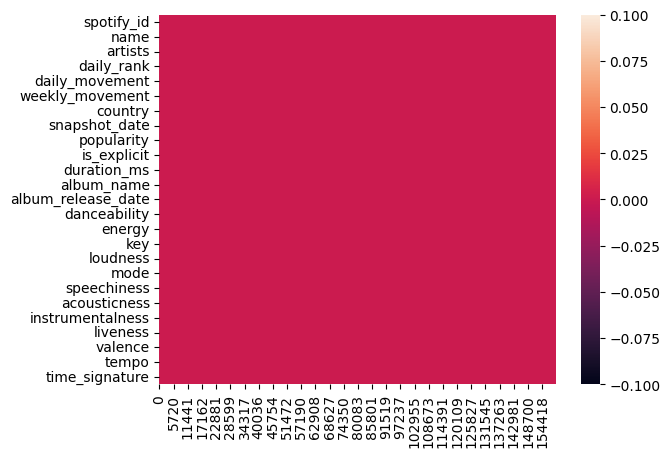

In [7]:
spotify = spotify.dropna(subset = ['name', 'artists', 'album_name', 'album_release_date'])

spotify['snapshot_date'] = pd.to_datetime(spotify['snapshot_date'])

sns.heatmap(spotify.isnull().T)

In [8]:
spotify.to_csv('spotify_cleaned.csv', index = False)